In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [5]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [15]:
scale_columns = df.drop('Outcome',axis = 1).columns
df[scale_columns] = scaler.fit_transform(df[scale_columns])

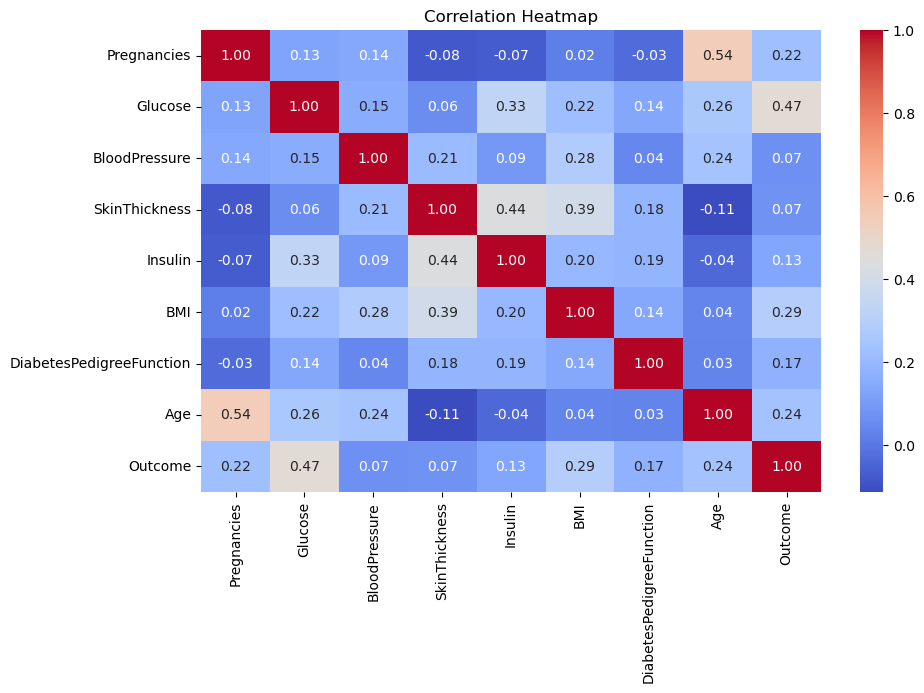

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [19]:
df.duplicated().sum()

0

In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [25]:
X = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [31]:
model = LogisticRegression()

In [33]:
model.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_predicted = model.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test,y_predicted)
accuracy

0.7662337662337663

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [43]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_accuracy

0.7207792207792207

In [49]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [51]:
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_accuracy

0.7467532467532467

In [55]:
cm = confusion_matrix(y_test,y_predicted)
cm

array([[86, 13],
       [23, 32]], dtype=int64)

In [57]:
cl = classification_report(y_test, y_predicted)
cl

'              precision    recall  f1-score   support\n\n           0       0.79      0.87      0.83        99\n           1       0.71      0.58      0.64        55\n\n    accuracy                           0.77       154\n   macro avg       0.75      0.73      0.73       154\nweighted avg       0.76      0.77      0.76       154\n'

In [59]:
import joblib

In [61]:
joblib.dump(model, 'health_risk_predictor_model.pkl')

['health_risk_predictor_model.pkl']